In [18]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


targetUrl_caffeine="https://raw.githubusercontent.com/Minon98/Python/main/caffeine.csv"

df = pd.read_csv(targetUrl_caffeine)
normalization_df = (df - df.mean())/df.std()
X = normalization_df.iloc[:, 0:3]
y = df.iloc[:, 4]

y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=5, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 12)                48        
                                                                 
 dense_46 (Dense)            (None, 6)                 78        
                                                                 
 dense_47 (Dense)            (None, 6)                 42        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


98/98 [==============================] - 1s 4ms/step - loss: 1.7873 - accuracy: 0.2541 - val_loss: 1.7419 - val_accuracy: 0.3361
Epoch 2/200
98/98 [==============================] - 0s 2ms/step - loss: 1.6910 - accuracy: 0.3852 - val_loss: 1.6473 - val_accuracy: 0.4016
Epoch 3/200
98/98 [==============================] - 0s 2ms/step - loss: 1.5963 - accuracy: 0.3750 - val_loss: 1.5365 - val_accuracy: 0.4098
Epoch 4/200
98/98 [==============================] - 0s 2ms/step - loss: 1.5024 - accuracy: 0.3975 - val_loss: 1.4336 - val_accuracy: 0.4344
Epoch 5/200
98/98 [==============================] - 0s 2ms/step - loss: 1.4344 - accuracy: 0.4119 - val_loss: 1.3736 - val_accuracy: 0.4754
Epoch 6/200
98/98 [==============================] - 0s 3ms/step - loss: 1.3929 - accuracy: 0.4324 - val_loss: 1.3307 - val_accuracy: 0.4754
Epoch 7/200
98/98 [==============================] - 0s 2ms/step - loss: 1.3575 - accuracy: 0.4262 - val_loss: 1.2888 - val_accuracy: 0.4754
Epoch 8/200
98/98 [======

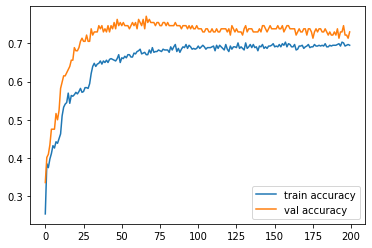

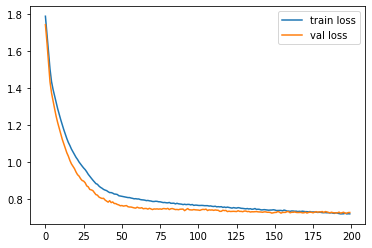

In [19]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()